In [96]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit, minimize
from scipy.integrate import solve_ivp
from scipy.interpolate import interp1d, CubicSpline

G = 6.6743e-11
Ms = 1.988416e30 #Mass of Sun kg
c = 299792458
L = G*Ms/c**2

### (a)

$P = K\rho^2$ <br>
$\frac{dm}{dr}= 4\pi r^2\rho$ <br>
Using definition of $P$,
$$\frac{d\nu}{dr} = 2\frac{m+4\pi r^3P}{r(r-2m)} = 2\frac{m+4\pi K\rho^2r^3}{r(r-2m)}$$
$\frac{dP}{dr} = -\frac{m+4\pi r^3P}{r(r-2m)}(\rho+P) = -\frac{1}{2}(\rho+P)\nu'$ <br>
$\frac{dp}{d\rho}\frac{d\rho}{dr} = -\frac{m+4\pi r^3P}{r(r-2m)}(\rho+P) \to 2K\rho\frac{d\rho}{dr} = -\frac{m+4\pi K\rho^2 r^3}{r(r-2m)}(\rho+K\rho^2)$. Then,

$$\frac{d\rho}{dr} = -\frac{m+4\pi K\rho^2 r^3}{r(r-2m)}\frac{1+K\rho}{2K} = -\frac{1}{2}\frac{1+K\rho}{2K}\nu'$$


In [98]:
def TOV(r, y, K=100):
    m, ν, ρ = y
    dm = 4*np.pi*r**2*ρ
    dν = 2*(m+4*np.pi*K*(ρ**2)*(r**3))/(r*(r-2*m)) if r > 0 else 0
    dρ = -(1+K*ρ)/(4*K)*dν
    return [dm, dν, dρ]

def stop(r, y): #Stop condition: do not let ρ be negative
    ρ = y[2]
    return 0 if ρ < 1e-10 else 1
stop.terminal = True

#Solves the white dwarf system with solve_ivp for given params.
def solve_TOV(ρc,max_step=0.1):
    y0 = (0,0,ρc)
    solution = solve_ivp(TOV, [0, 20], y0, events=stop, max_step=max_step)
    return solution

def obtain_NS_params(ρc,max_step=0.1): #Function that solves TOV for given central densities
    M = 0*ρc
    R = 0*ρc
    for i in range(len(ρc)):
        solution = solve_TOV(ρc[i],max_step=max_step)
        M[i] = solution.y[0][-1]
        R[i] = solution.t[-1]
    return M,R

Text(0.5, 1.0, 'Neutron Star Mass vs Radius Curve')

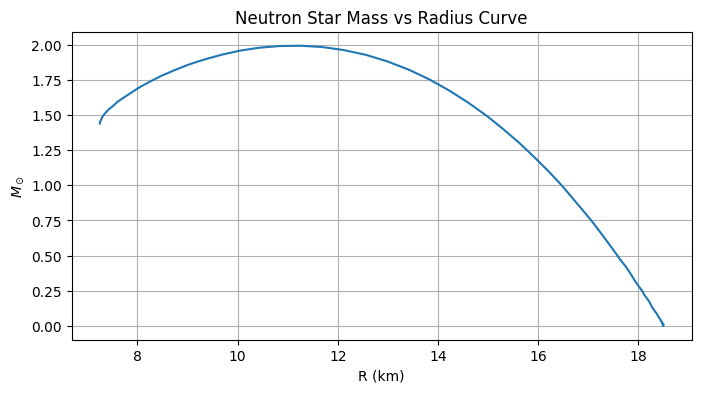

In [99]:
ρc = np.logspace(-7,-1,100)
_M,_R = obtain_NS_params(ρc,max_step=0.01)
plt.figure(figsize=(8,4))
plt.plot(_R*L/1000,_M); plt.grid()
plt.xlabel('R (km)'); plt.ylabel(r'$M_\odot$')
plt.title('Neutron Star Mass vs Radius Curve')